# 「標準ベイズ統計学」の勉強メモ

In [30]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

## 3.2 ポアソンモデル
確率変数Yの予測モデルがポアソン分布と考えられるとき
- 同時確率密度関数P(y1..yn|θ)はパラメータθの元で各確率変数の確率密度の積で表される
- 同時確率密度関数と共役な分布として、パラメータθの事前分布はガンマ分布が考えられる
- なので事後分布はガンマ分布になる
- 予測分布p(y~ | y1..yn)は負の二項分布に従う

大卒の事後分布の95%信用区間[1.70494315 2.22267902]
非大卒の事後分布の95%信用区間[1.17343691 1.89083626]


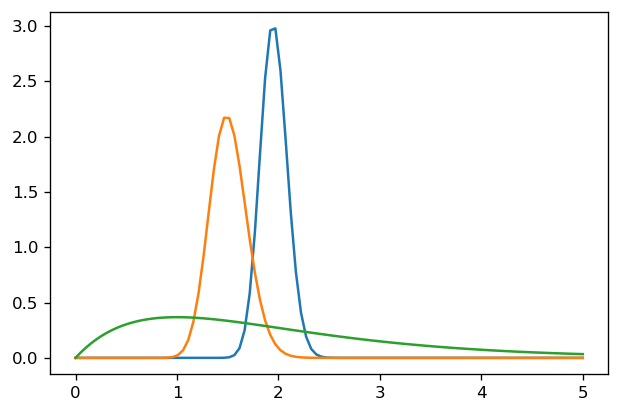

In [32]:
#ガンマ分布(事前分布)のパラメータを決定
a = 2
b = 1

# サンプルデータの定義
n1 = 111 # 大卒で子供を持っている人の数
sy1 = 217 # 大卒の人の数
n2 = 44 # 非大卒で子供を持っている人の数
sy2 = 66 # 非大卒の人の数

# 大卒の事後分布
a1_posterior = a+sy1
b1_posterior = b+n1
mu_posterior = a1_posterior / b1_posterior # 事後分布の期待値はこうなる
gamma_dist1 = gamma(a1_posterior, scale=1/b1_posterior)
print(f"大卒の事後分布の95%信用区間{gamma_dist1.ppf([0.025, 0.975])}")

# 非大卒の事後分布
a2_posterior = a+sy2
b2_posterior = b+n2
mu_posterior = a2_posterior / b2_posterior # 事後分布の期待値はこうなる
gamma_dist2 = gamma(a2_posterior, scale=1/b2_posterior)
print(f"非大卒の事後分布の95%信用区間{gamma_dist2.ppf([0.025, 0.975])}")

ls = np.linspace(0, 5, 100)
fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax.plot(ls, gamma_dist1.pdf(ls))
ax.plot(ls, gamma_dist2.pdf(ls))
ax.plot(ls, gamma(a, scale=1/b).pdf(ls))
plt.show()